In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHCnbF3yIdhRnKboyrfVaYhU69PEzRu-7keHU8QQZdJmxP6L46K7hg
Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/EVA5/Week7New/")

In [6]:
import time
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from utils.misc_utils import get_device_type
from models.networks.mnist_ghost_bn_se import GhostNet
from models.networks.mnist_normal_bn_se import Net
from configs import basic_config
from models.model_builder import build_model
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from utils import logger_utils
from torchsummary import summary

In [7]:
logger = logger_utils.get_logger(__name__)

In [8]:
def get_base_model(is_gbn: bool = False): 
  device = get_device_type()
  model = Net().to(device) if is_gbn else GhostNet().to(device)
  return model

In [9]:
def get_data_loaders():
  logger.info("\n**** Started Loading data ****\n")
  train_loader = BaseDataLoader(for_training=True).get_data_loader() # Internally it transforms as well w.r.to configs.basic_config
  test_loader = BaseDataLoader(for_training=False).get_data_loader() # Internally it transforms as well w.r.to configs.basic_config
  logger.info("\n**** Ended Loading data ****\n")
  return train_loader, test_loader

In [10]:
def start_training(EPOCHS, device, train_loader, test_loader, **models_dict):
    results = {}
    logger.info("\n**** Started training ****\n")
    for model_type in models_dict:
        #print(f"Model: {model_type}")
        logger.info(f"\nModel: {model_type}\n")
        train_accs, train_losses, test_acc, test_losses, best_model = build_model(EPOCHS, device, train_loader, test_loader, **models_dict[model_type])
        results[model_type] = [train_accs, train_losses, test_acc, test_losses, best_model]
        #print(results)
        logger.info(f"\nresults : {results}\n")
        time.sleep(10)
    logger.info("\n**** Ended training ****\n")
    return results

In [11]:
def plot_results(lst_plottingJobs, lst_plottingLegends, title):
  logger.info(f"\nPlotting graph for {title}\n")
  plot_multigraph(lst_plottingJobs,lst_plottingLegends,title)


In [19]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(1,28,28))

In [20]:
bn_network = get_base_model()
print_summary(bn_network,'Network summary with BatchNormalization')

Network summary with BatchNormalization
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
    GhostBatchNorm-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
    GhostBatchNorm-6           [-1, 16, 24, 24]              32
         MaxPool2d-7           [-1, 16, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             128
              ReLU-9            [-1, 8, 12, 12]               0
   GhostBatchNorm-10            [-1, 8, 12, 12]              16
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
   GhostBatchNorm-13           [-1, 16, 10, 10]              32

In [ ]:
EPOCHS = basic_config.EPOCHS
device = get_device_type()
results = {}

models_dict = {'l1_BN': {'model': get_base_model(), 'l1_lambda':3.994568295536243e-05},
          'l2_BN': {'model': get_base_model(), 'l2_lambda':0.0002871},
          'l1_l2_BN': {'model': get_base_model(), 'l1_lambda':1.4700778484806588e-05, 'l2_lambda':1.4212922008994122e-05},
          'GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':0, 'l2_lambda':0},
          'l1_l2_GBN': {'model': get_base_model(is_gbn = True), 'l1_lambda':8.283167683030542e-05, 'l2_lambda':9.098971072011508e-05},
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

## Training

train_loader, test_loader = get_data_loaders()
results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)


**** Started Loading data ****

CUDA Available? True


  0%|          | 0/469 [00:00<?, ?it/s]

CUDA Available? True
CUDA Available? True

**** Ended Loading data ****


**** Started training ****


Model: l1_BN

3.994568295536243e-05 0
[EPOCH:0]


Loss=0.12019580602645874 Batch_id=468 Current_train_batch_accuracy=93.73: 100%|██████████| 469/469 [00:14<00:00, 31.81it/s]



Train set: Average loss: 0.0881, Accuracy: 58667/60000 (97.78%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0753, Accuracy: 9787/10000 (97.87%)

best_test_accuracy 97.87
[EPOCH:1]


Loss=0.08750101923942566 Batch_id=468 Current_train_batch_accuracy=97.92: 100%|██████████| 469/469 [00:13<00:00, 33.70it/s]



Train set: Average loss: 0.0620, Accuracy: 58974/60000 (98.29%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0512, Accuracy: 9852/10000 (98.52%)

best_test_accuracy 98.52
[EPOCH:2]


Loss=0.1326933354139328 Batch_id=468 Current_train_batch_accuracy=98.29: 100%|██████████| 469/469 [00:14<00:00, 33.42it/s]



Train set: Average loss: 0.0513, Accuracy: 59131/60000 (98.55%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0455, Accuracy: 9859/10000 (98.59%)

best_test_accuracy 98.59
[EPOCH:3]


Loss=0.1962364912033081 Batch_id=468 Current_train_batch_accuracy=98.43: 100%|██████████| 469/469 [00:14<00:00, 32.98it/s]



Train set: Average loss: 0.0488, Accuracy: 59218/60000 (98.70%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0433, Accuracy: 9878/10000 (98.78%)

best_test_accuracy 98.78
[EPOCH:4]


Loss=0.12876681983470917 Batch_id=468 Current_train_batch_accuracy=98.48: 100%|██████████| 469/469 [00:14<00:00, 33.42it/s]



Train set: Average loss: 0.0418, Accuracy: 59288/60000 (98.81%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 9892/10000 (98.92%)

best_test_accuracy 98.92
[EPOCH:5]


Loss=0.10315299034118652 Batch_id=468 Current_train_batch_accuracy=98.62: 100%|██████████| 469/469 [00:14<00:00, 33.11it/s]



Train set: Average loss: 0.0501, Accuracy: 59144/60000 (98.57%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0421, Accuracy: 9866/10000 (98.66%)

best_test_accuracy 98.92
[EPOCH:6]


Loss=0.0714322179555893 Batch_id=468 Current_train_batch_accuracy=98.71: 100%|██████████| 469/469 [00:13<00:00, 34.06it/s]



Train set: Average loss: 0.0359, Accuracy: 59370/60000 (98.95%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0364, Accuracy: 9891/10000 (98.91%)

best_test_accuracy 98.92
[EPOCH:7]


Loss=0.08893577754497528 Batch_id=468 Current_train_batch_accuracy=98.76: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]



Train set: Average loss: 0.0486, Accuracy: 59167/60000 (98.61%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0455, Accuracy: 9866/10000 (98.66%)

best_test_accuracy 98.92
[EPOCH:8]


Loss=0.09938323497772217 Batch_id=468 Current_train_batch_accuracy=98.77: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]



Train set: Average loss: 0.0346, Accuracy: 59398/60000 (99.00%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 9905/10000 (99.05%)

best_test_accuracy 99.05
[EPOCH:9]


Loss=0.07851773500442505 Batch_id=468 Current_train_batch_accuracy=98.81: 100%|██████████| 469/469 [00:13<00:00, 34.72it/s]



Train set: Average loss: 0.0376, Accuracy: 59313/60000 (98.86%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0340, Accuracy: 9900/10000 (99.00%)

best_test_accuracy 99.05
[EPOCH:10]


Loss=0.051917798817157745 Batch_id=468 Current_train_batch_accuracy=98.82: 100%|██████████| 469/469 [00:13<00:00, 34.73it/s]



Train set: Average loss: 0.0438, Accuracy: 59191/60000 (98.65%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0442, Accuracy: 9858/10000 (98.58%)

best_test_accuracy 99.05
[EPOCH:11]


Loss=0.09416867047548294 Batch_id=468 Current_train_batch_accuracy=98.85: 100%|██████████| 469/469 [00:13<00:00, 35.17it/s]



Train set: Average loss: 0.0292, Accuracy: 59501/60000 (99.17%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9917/10000 (99.17%)

best_test_accuracy 99.17
[EPOCH:12]


Loss=0.045306671410799026 Batch_id=468 Current_train_batch_accuracy=99.20: 100%|██████████| 469/469 [00:13<00:00, 34.89it/s]



Train set: Average loss: 0.0194, Accuracy: 59680/60000 (99.47%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9940/10000 (99.40%)

best_test_accuracy 99.4
[EPOCH:13]


Loss=0.044120896607637405 Batch_id=468 Current_train_batch_accuracy=99.35: 100%|██████████| 469/469 [00:13<00:00, 34.23it/s]



Train set: Average loss: 0.0194, Accuracy: 59677/60000 (99.46%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9928/10000 (99.28%)

best_test_accuracy 99.4
[EPOCH:14]


Loss=0.09579913318157196 Batch_id=468 Current_train_batch_accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 34.69it/s]



Train set: Average loss: 0.0186, Accuracy: 59707/60000 (99.51%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Accuracy: 9937/10000 (99.37%)

best_test_accuracy 99.4
[EPOCH:15]


Loss=0.07518621534109116 Batch_id=468 Current_train_batch_accuracy=99.30: 100%|██████████| 469/469 [00:13<00:00, 35.42it/s]



Train set: Average loss: 0.0193, Accuracy: 59699/60000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.4
[EPOCH:16]


Loss=0.1077830120921135 Batch_id=468 Current_train_batch_accuracy=99.28: 100%|██████████| 469/469 [00:13<00:00, 34.92it/s]



Train set: Average loss: 0.0187, Accuracy: 59699/60000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9938/10000 (99.38%)

best_test_accuracy 99.4
[EPOCH:17]


Loss=0.056325141340494156 Batch_id=468 Current_train_batch_accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 34.70it/s]



Train set: Average loss: 0.0178, Accuracy: 59704/60000 (99.51%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9936/10000 (99.36%)

best_test_accuracy 99.4
[EPOCH:18]


Loss=0.05261716991662979 Batch_id=468 Current_train_batch_accuracy=99.23: 100%|██████████| 469/469 [00:13<00:00, 35.25it/s]



Train set: Average loss: 0.0177, Accuracy: 59722/60000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9940/10000 (99.40%)

best_test_accuracy 99.4
[EPOCH:19]


Loss=0.053298573940992355 Batch_id=468 Current_train_batch_accuracy=99.33: 100%|██████████| 469/469 [00:13<00:00, 35.59it/s]



Train set: Average loss: 0.0192, Accuracy: 59682/60000 (99.47%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9937/10000 (99.37%)

best_test_accuracy 99.4
[EPOCH:20]


Loss=0.043719444423913956 Batch_id=468 Current_train_batch_accuracy=99.33: 100%|██████████| 469/469 [00:13<00:00, 34.13it/s]



Train set: Average loss: 0.0173, Accuracy: 59716/60000 (99.53%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9934/10000 (99.34%)

best_test_accuracy 99.4
[EPOCH:21]


Loss=0.04988675191998482 Batch_id=468 Current_train_batch_accuracy=99.37: 100%|██████████| 469/469 [00:13<00:00, 35.10it/s]



Train set: Average loss: 0.0176, Accuracy: 59701/60000 (99.50%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9934/10000 (99.34%)

best_test_accuracy 99.4
[EPOCH:22]


Loss=0.14748872816562653 Batch_id=468 Current_train_batch_accuracy=99.36: 100%|██████████| 469/469 [00:13<00:00, 34.48it/s]



Train set: Average loss: 0.0175, Accuracy: 59714/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9929/10000 (99.29%)

best_test_accuracy 99.4
[EPOCH:23]


Loss=0.040190163999795914 Batch_id=468 Current_train_batch_accuracy=99.32: 100%|██████████| 469/469 [00:13<00:00, 34.94it/s]



Train set: Average loss: 0.0181, Accuracy: 59695/60000 (99.49%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9939/10000 (99.39%)

best_test_accuracy 99.4
[EPOCH:24]


Loss=0.04882974177598953 Batch_id=468 Current_train_batch_accuracy=99.41: 100%|██████████| 469/469 [00:12<00:00, 36.24it/s]



Train set: Average loss: 0.0148, Accuracy: 59782/60000 (99.64%)


Test set: Average loss: 0.0184, Accuracy: 9944/10000 (99.44%)

best_test_accuracy 99.44

results : {'l1_BN': [[97.77833333333334, 98.29, 98.55166666666666, 98.69666666666667, 98.81333333333333, 98.57333333333334, 98.95, 98.61166666666666, 98.99666666666667, 98.855, 98.65166666666667, 99.16833333333334, 99.46666666666667, 99.46166666666667, 99.51166666666667, 99.49833333333333, 99.49833333333333, 99.50666666666666, 99.53666666666666, 99.47, 99.52666666666667, 99.50166666666667, 99.52333333333333, 99.49166666666666, 99.63666666666667], [0.08809828455845516, 0.061960277022918064, 0.05128683967192968, 0.048828917894760765, 0.041757252955436704, 0.050128988341490426, 0.03594373518029849, 0.04857163166205088, 0.03461634757767121, 0.03760836264193058, 0.043798981792728106, 0.029189149190982182, 0.019399467170983554, 0.01943389255180955, 0.018632559445500373, 0.01932456497202317, 0.01865188867573937, 0.017786426210651796, 0.017

  0%|          | 0/469 [00:00<?, ?it/s]


Model: l2_BN

0 0.0002871
[EPOCH:0]


Loss=0.0768708661198616 Batch_id=468 Current_train_batch_accuracy=93.69: 100%|██████████| 469/469 [00:13<00:00, 35.33it/s]



Train set: Average loss: 0.1202, Accuracy: 58155/60000 (96.92%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1029, Accuracy: 9739/10000 (97.39%)

best_test_accuracy 97.39
[EPOCH:1]


Loss=0.0806821957230568 Batch_id=468 Current_train_batch_accuracy=97.55: 100%|██████████| 469/469 [00:13<00:00, 33.96it/s]



Train set: Average loss: 0.1124, Accuracy: 58066/60000 (96.78%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1028, Accuracy: 9699/10000 (96.99%)

best_test_accuracy 97.39
[EPOCH:2]


Loss=0.06851919740438461 Batch_id=468 Current_train_batch_accuracy=98.04: 100%|██████████| 469/469 [00:14<00:00, 33.39it/s]



Train set: Average loss: 0.1201, Accuracy: 57987/60000 (96.64%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1061, Accuracy: 9694/10000 (96.94%)

best_test_accuracy 97.39
[EPOCH:3]


Loss=0.054701682180166245 Batch_id=468 Current_train_batch_accuracy=98.22: 100%|██████████| 469/469 [00:13<00:00, 34.62it/s]



Train set: Average loss: 0.0584, Accuracy: 59136/60000 (98.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0484, Accuracy: 9877/10000 (98.77%)

best_test_accuracy 98.77
[EPOCH:4]


Loss=0.03468921035528183 Batch_id=468 Current_train_batch_accuracy=98.32: 100%|██████████| 469/469 [00:13<00:00, 34.17it/s]



Train set: Average loss: 0.0851, Accuracy: 58629/60000 (97.72%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0761, Accuracy: 9774/10000 (97.74%)

best_test_accuracy 98.77
[EPOCH:5]


Loss=0.06540859490633011 Batch_id=468 Current_train_batch_accuracy=98.41: 100%|██████████| 469/469 [00:13<00:00, 33.90it/s]



Train set: Average loss: 0.0791, Accuracy: 58812/60000 (98.02%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0630, Accuracy: 9843/10000 (98.43%)

best_test_accuracy 98.77
[EPOCH:6]


Loss=0.14058957993984222 Batch_id=468 Current_train_batch_accuracy=98.41: 100%|██████████| 469/469 [00:13<00:00, 35.28it/s]



Train set: Average loss: 0.0745, Accuracy: 58865/60000 (98.11%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0595, Accuracy: 9839/10000 (98.39%)

best_test_accuracy 98.77
[EPOCH:7]


Loss=0.07537904381752014 Batch_id=468 Current_train_batch_accuracy=98.47: 100%|██████████| 469/469 [00:13<00:00, 34.29it/s]



Train set: Average loss: 0.0993, Accuracy: 58373/60000 (97.29%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0787, Accuracy: 9787/10000 (97.87%)

best_test_accuracy 98.77
[EPOCH:8]


Loss=0.09006363153457642 Batch_id=468 Current_train_batch_accuracy=98.44: 100%|██████████| 469/469 [00:13<00:00, 35.24it/s]



Train set: Average loss: 0.1086, Accuracy: 58146/60000 (96.91%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0924, Accuracy: 9732/10000 (97.32%)

best_test_accuracy 98.77
[EPOCH:9]


Loss=0.024898134171962738 Batch_id=468 Current_train_batch_accuracy=98.54: 100%|██████████| 469/469 [00:13<00:00, 34.89it/s]



Train set: Average loss: 0.0501, Accuracy: 59247/60000 (98.75%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0443, Accuracy: 9886/10000 (98.86%)

best_test_accuracy 98.86
[EPOCH:10]


Loss=0.07043231278657913 Batch_id=468 Current_train_batch_accuracy=98.59: 100%|██████████| 469/469 [00:13<00:00, 35.71it/s]



Train set: Average loss: 0.0582, Accuracy: 59104/60000 (98.51%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0492, Accuracy: 9869/10000 (98.69%)

best_test_accuracy 98.86
[EPOCH:11]


Loss=0.06797026842832565 Batch_id=468 Current_train_batch_accuracy=98.59: 100%|██████████| 469/469 [00:13<00:00, 34.79it/s]



Train set: Average loss: 0.0514, Accuracy: 59241/60000 (98.73%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0448, Accuracy: 9890/10000 (98.90%)

best_test_accuracy 98.9
[EPOCH:12]


Loss=0.02908460795879364 Batch_id=468 Current_train_batch_accuracy=98.99: 100%|██████████| 469/469 [00:13<00:00, 34.59it/s]



Train set: Average loss: 0.0318, Accuracy: 59572/60000 (99.29%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0292, Accuracy: 9928/10000 (99.28%)

best_test_accuracy 99.28
[EPOCH:13]


Loss=0.0960511863231659 Batch_id=468 Current_train_batch_accuracy=99.04: 100%|██████████| 469/469 [00:13<00:00, 34.90it/s]



Train set: Average loss: 0.0307, Accuracy: 59575/60000 (99.29%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 9918/10000 (99.18%)

best_test_accuracy 99.28
[EPOCH:14]


Loss=0.029792143031954765 Batch_id=468 Current_train_batch_accuracy=99.05: 100%|██████████| 469/469 [00:13<00:00, 35.62it/s]



Train set: Average loss: 0.0331, Accuracy: 59554/60000 (99.26%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9918/10000 (99.18%)

best_test_accuracy 99.28
[EPOCH:15]


Loss=0.02420223504304886 Batch_id=468 Current_train_batch_accuracy=99.06: 100%|██████████| 469/469 [00:13<00:00, 34.94it/s]



Train set: Average loss: 0.0317, Accuracy: 59580/60000 (99.30%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9914/10000 (99.14%)

best_test_accuracy 99.28
[EPOCH:16]


Loss=0.012129832990467548 Batch_id=468 Current_train_batch_accuracy=99.10: 100%|██████████| 469/469 [00:13<00:00, 35.09it/s]



Train set: Average loss: 0.0306, Accuracy: 59561/60000 (99.27%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9921/10000 (99.21%)

best_test_accuracy 99.28
[EPOCH:17]


Loss=0.05226567015051842 Batch_id=468 Current_train_batch_accuracy=99.03: 100%|██████████| 469/469 [00:13<00:00, 34.43it/s]



Train set: Average loss: 0.0316, Accuracy: 59579/60000 (99.30%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9925/10000 (99.25%)

best_test_accuracy 99.28
[EPOCH:18]


Loss=0.09519013017416 Batch_id=468 Current_train_batch_accuracy=99.09: 100%|██████████| 469/469 [00:13<00:00, 35.68it/s]



Train set: Average loss: 0.0303, Accuracy: 59592/60000 (99.32%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9927/10000 (99.27%)

best_test_accuracy 99.28
[EPOCH:19]


Loss=0.0223857332020998 Batch_id=468 Current_train_batch_accuracy=99.04: 100%|██████████| 469/469 [00:13<00:00, 35.25it/s]



Train set: Average loss: 0.0316, Accuracy: 59588/60000 (99.31%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0312, Accuracy: 9920/10000 (99.20%)

best_test_accuracy 99.28
[EPOCH:20]


Loss=0.09934010356664658 Batch_id=468 Current_train_batch_accuracy=99.09: 100%|██████████| 469/469 [00:13<00:00, 34.11it/s]



Train set: Average loss: 0.0347, Accuracy: 59542/60000 (99.24%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Accuracy: 9914/10000 (99.14%)

best_test_accuracy 99.28
[EPOCH:21]


Loss=0.01792996935546398 Batch_id=468 Current_train_batch_accuracy=99.07: 100%|██████████| 469/469 [00:13<00:00, 34.67it/s]



Train set: Average loss: 0.0318, Accuracy: 59588/60000 (99.31%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9913/10000 (99.13%)

best_test_accuracy 99.28
[EPOCH:22]


Loss=0.03584470972418785 Batch_id=468 Current_train_batch_accuracy=99.13: 100%|██████████| 469/469 [00:13<00:00, 34.25it/s]



Train set: Average loss: 0.0300, Accuracy: 59593/60000 (99.32%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0295, Accuracy: 9932/10000 (99.32%)

best_test_accuracy 99.32
[EPOCH:23]


Loss=0.048780832439661026 Batch_id=468 Current_train_batch_accuracy=99.04: 100%|██████████| 469/469 [00:13<00:00, 35.90it/s]



Train set: Average loss: 0.0323, Accuracy: 59546/60000 (99.24%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0313, Accuracy: 9907/10000 (99.07%)

best_test_accuracy 99.32
[EPOCH:24]


Loss=0.027273138985037804 Batch_id=468 Current_train_batch_accuracy=99.18: 100%|██████████| 469/469 [00:13<00:00, 35.38it/s]



Train set: Average loss: 0.0261, Accuracy: 59662/60000 (99.44%)


Test set: Average loss: 0.0268, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.32

results : {'l1_BN': [[97.77833333333334, 98.29, 98.55166666666666, 98.69666666666667, 98.81333333333333, 98.57333333333334, 98.95, 98.61166666666666, 98.99666666666667, 98.855, 98.65166666666667, 99.16833333333334, 99.46666666666667, 99.46166666666667, 99.51166666666667, 99.49833333333333, 99.49833333333333, 99.50666666666666, 99.53666666666666, 99.47, 99.52666666666667, 99.50166666666667, 99.52333333333333, 99.49166666666666, 99.63666666666667], [0.08809828455845516, 0.061960277022918064, 0.05128683967192968, 0.048828917894760765, 0.041757252955436704, 0.050128988341490426, 0.03594373518029849, 0.04857163166205088, 0.03461634757767121, 0.03760836264193058, 0.043798981792728106, 0.029189149190982182, 0.019399467170983554, 0.01943389255180955, 0.018632559445500373, 0.01932456497202317, 0.01865188867573937, 0.017786426210651796, 0.017

  0%|          | 0/469 [00:00<?, ?it/s]


Model: l1_l2_BN

1.4700778484806588e-05 1.4212922008994122e-05
[EPOCH:0]


Loss=0.10373228043317795 Batch_id=468 Current_train_batch_accuracy=93.71: 100%|██████████| 469/469 [00:13<00:00, 35.07it/s]



Train set: Average loss: 0.1162, Accuracy: 58126/60000 (96.88%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0858, Accuracy: 9766/10000 (97.66%)

best_test_accuracy 97.66
[EPOCH:1]


Loss=0.12095195055007935 Batch_id=468 Current_train_batch_accuracy=97.79: 100%|██████████| 469/469 [00:13<00:00, 35.26it/s]



Train set: Average loss: 0.0611, Accuracy: 59004/60000 (98.34%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0490, Accuracy: 9866/10000 (98.66%)

best_test_accuracy 98.66
[EPOCH:2]


Loss=0.055891767144203186 Batch_id=468 Current_train_batch_accuracy=98.27: 100%|██████████| 469/469 [00:13<00:00, 34.84it/s]



Train set: Average loss: 0.0701, Accuracy: 58774/60000 (97.96%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0634, Accuracy: 9799/10000 (97.99%)

best_test_accuracy 98.66
[EPOCH:3]


Loss=0.04375907778739929 Batch_id=468 Current_train_batch_accuracy=98.38: 100%|██████████| 469/469 [00:13<00:00, 34.94it/s]



Train set: Average loss: 0.0551, Accuracy: 59067/60000 (98.44%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0492, Accuracy: 9846/10000 (98.46%)

best_test_accuracy 98.66
[EPOCH:4]


Loss=0.12581905722618103 Batch_id=468 Current_train_batch_accuracy=98.60: 100%|██████████| 469/469 [00:13<00:00, 35.55it/s]



Train set: Average loss: 0.0439, Accuracy: 59242/60000 (98.74%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0377, Accuracy: 9883/10000 (98.83%)

best_test_accuracy 98.83
[EPOCH:5]


Loss=0.04318581894040108 Batch_id=468 Current_train_batch_accuracy=98.65: 100%|██████████| 469/469 [00:13<00:00, 35.26it/s]



Train set: Average loss: 0.0393, Accuracy: 59334/60000 (98.89%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0367, Accuracy: 9882/10000 (98.82%)

best_test_accuracy 98.83
[EPOCH:6]


Loss=0.03666369616985321 Batch_id=468 Current_train_batch_accuracy=98.80: 100%|██████████| 469/469 [00:13<00:00, 35.42it/s]



Train set: Average loss: 0.0333, Accuracy: 59432/60000 (99.05%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0314, Accuracy: 9908/10000 (99.08%)

best_test_accuracy 99.08
[EPOCH:7]


Loss=0.03347349539399147 Batch_id=468 Current_train_batch_accuracy=98.80: 100%|██████████| 469/469 [00:13<00:00, 34.06it/s]



Train set: Average loss: 0.0370, Accuracy: 59362/60000 (98.94%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9905/10000 (99.05%)

best_test_accuracy 99.08
[EPOCH:8]


Loss=0.050339654088020325 Batch_id=468 Current_train_batch_accuracy=98.92: 100%|██████████| 469/469 [00:13<00:00, 34.05it/s]



Train set: Average loss: 0.0306, Accuracy: 59486/60000 (99.14%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0266, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.3
[EPOCH:9]


Loss=0.05374622344970703 Batch_id=468 Current_train_batch_accuracy=98.85: 100%|██████████| 469/469 [00:13<00:00, 35.30it/s]



Train set: Average loss: 0.0340, Accuracy: 59415/60000 (99.03%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0315, Accuracy: 9897/10000 (98.97%)

best_test_accuracy 99.3
[EPOCH:10]


Loss=0.03352959454059601 Batch_id=468 Current_train_batch_accuracy=98.92: 100%|██████████| 469/469 [00:13<00:00, 35.65it/s]



Train set: Average loss: 0.0358, Accuracy: 59390/60000 (98.98%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0307, Accuracy: 9904/10000 (99.04%)

best_test_accuracy 99.3
[EPOCH:11]


Loss=0.02555868774652481 Batch_id=468 Current_train_batch_accuracy=98.87: 100%|██████████| 469/469 [00:13<00:00, 34.57it/s]



Train set: Average loss: 0.0290, Accuracy: 59497/60000 (99.16%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9906/10000 (99.06%)

best_test_accuracy 99.3
[EPOCH:12]


Loss=0.06940671056509018 Batch_id=468 Current_train_batch_accuracy=99.24: 100%|██████████| 469/469 [00:13<00:00, 35.27it/s]



Train set: Average loss: 0.0186, Accuracy: 59721/60000 (99.53%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9936/10000 (99.36%)

best_test_accuracy 99.36
[EPOCH:13]


Loss=0.02746930718421936 Batch_id=468 Current_train_batch_accuracy=99.28: 100%|██████████| 469/469 [00:13<00:00, 35.45it/s]



Train set: Average loss: 0.0190, Accuracy: 59683/60000 (99.47%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9942/10000 (99.42%)

best_test_accuracy 99.42
[EPOCH:14]


Loss=0.02995046228170395 Batch_id=468 Current_train_batch_accuracy=99.32: 100%|██████████| 469/469 [00:13<00:00, 34.96it/s]



Train set: Average loss: 0.0181, Accuracy: 59708/60000 (99.51%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Accuracy: 9938/10000 (99.38%)

best_test_accuracy 99.42
[EPOCH:15]


Loss=0.026358503848314285 Batch_id=468 Current_train_batch_accuracy=99.30: 100%|██████████| 469/469 [00:13<00:00, 35.79it/s]



Train set: Average loss: 0.0174, Accuracy: 59735/60000 (99.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9937/10000 (99.37%)

best_test_accuracy 99.42
[EPOCH:16]


Loss=0.042959656566381454 Batch_id=468 Current_train_batch_accuracy=99.33: 100%|██████████| 469/469 [00:13<00:00, 35.07it/s]



Train set: Average loss: 0.0177, Accuracy: 59731/60000 (99.55%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9937/10000 (99.37%)

best_test_accuracy 99.42
[EPOCH:17]


Loss=0.05872084200382233 Batch_id=468 Current_train_batch_accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 35.23it/s]



Train set: Average loss: 0.0177, Accuracy: 59726/60000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9934/10000 (99.34%)

best_test_accuracy 99.42
[EPOCH:18]


Loss=0.031401634216308594 Batch_id=468 Current_train_batch_accuracy=99.41: 100%|██████████| 469/469 [00:13<00:00, 35.25it/s]



Train set: Average loss: 0.0169, Accuracy: 59730/60000 (99.55%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9931/10000 (99.31%)

best_test_accuracy 99.42
[EPOCH:19]


Loss=0.0376897007226944 Batch_id=468 Current_train_batch_accuracy=99.38: 100%|██████████| 469/469 [00:13<00:00, 35.34it/s]



Train set: Average loss: 0.0170, Accuracy: 59724/60000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9943/10000 (99.43%)

best_test_accuracy 99.43
[EPOCH:20]


Loss=0.01962943561375141 Batch_id=468 Current_train_batch_accuracy=99.35: 100%|██████████| 469/469 [00:13<00:00, 35.14it/s]



Train set: Average loss: 0.0166, Accuracy: 59738/60000 (99.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9939/10000 (99.39%)

best_test_accuracy 99.43
[EPOCH:21]


Loss=0.026989050209522247 Batch_id=468 Current_train_batch_accuracy=99.35: 100%|██████████| 469/469 [00:13<00:00, 34.55it/s]



Train set: Average loss: 0.0164, Accuracy: 59740/60000 (99.57%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9939/10000 (99.39%)

best_test_accuracy 99.43
[EPOCH:22]


Loss=0.1328098624944687 Batch_id=468 Current_train_batch_accuracy=99.39: 100%|██████████| 469/469 [00:13<00:00, 34.66it/s]



Train set: Average loss: 0.0164, Accuracy: 59757/60000 (99.59%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9938/10000 (99.38%)

best_test_accuracy 99.43
[EPOCH:23]


Loss=0.034901268780231476 Batch_id=468 Current_train_batch_accuracy=99.37: 100%|██████████| 469/469 [00:13<00:00, 35.30it/s]



Train set: Average loss: 0.0154, Accuracy: 59777/60000 (99.63%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9943/10000 (99.43%)

best_test_accuracy 99.43
[EPOCH:24]


Loss=0.024579759687185287 Batch_id=468 Current_train_batch_accuracy=99.45: 100%|██████████| 469/469 [00:13<00:00, 35.07it/s]



Train set: Average loss: 0.0152, Accuracy: 59779/60000 (99.63%)


Test set: Average loss: 0.0188, Accuracy: 9940/10000 (99.40%)

best_test_accuracy 99.43

results : {'l1_BN': [[97.77833333333334, 98.29, 98.55166666666666, 98.69666666666667, 98.81333333333333, 98.57333333333334, 98.95, 98.61166666666666, 98.99666666666667, 98.855, 98.65166666666667, 99.16833333333334, 99.46666666666667, 99.46166666666667, 99.51166666666667, 99.49833333333333, 99.49833333333333, 99.50666666666666, 99.53666666666666, 99.47, 99.52666666666667, 99.50166666666667, 99.52333333333333, 99.49166666666666, 99.63666666666667], [0.08809828455845516, 0.061960277022918064, 0.05128683967192968, 0.048828917894760765, 0.041757252955436704, 0.050128988341490426, 0.03594373518029849, 0.04857163166205088, 0.03461634757767121, 0.03760836264193058, 0.043798981792728106, 0.029189149190982182, 0.019399467170983554, 0.01943389255180955, 0.018632559445500373, 0.01932456497202317, 0.01865188867573937, 0.017786426210651796, 0.017

  0%|          | 0/469 [00:00<?, ?it/s]


Model: GBN

0 0
[EPOCH:0]


Loss=0.07317378371953964 Batch_id=468 Current_train_batch_accuracy=93.97: 100%|██████████| 469/469 [00:12<00:00, 36.33it/s]



Train set: Average loss: 0.1064, Accuracy: 58218/60000 (97.03%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0845, Accuracy: 9760/10000 (97.60%)

best_test_accuracy 97.6
[EPOCH:1]


Loss=0.11244609206914902 Batch_id=468 Current_train_batch_accuracy=97.89: 100%|██████████| 469/469 [00:12<00:00, 36.18it/s]



Train set: Average loss: 0.0778, Accuracy: 58727/60000 (97.88%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0676, Accuracy: 9810/10000 (98.10%)

best_test_accuracy 98.1
[EPOCH:2]


Loss=0.03671086207032204 Batch_id=468 Current_train_batch_accuracy=98.25: 100%|██████████| 469/469 [00:13<00:00, 35.48it/s]



Train set: Average loss: 0.0635, Accuracy: 58962/60000 (98.27%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0535, Accuracy: 9848/10000 (98.48%)

best_test_accuracy 98.48
[EPOCH:3]


Loss=0.09839919209480286 Batch_id=468 Current_train_batch_accuracy=98.52: 100%|██████████| 469/469 [00:13<00:00, 35.42it/s]



Train set: Average loss: 0.0518, Accuracy: 59113/60000 (98.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0443, Accuracy: 9877/10000 (98.77%)

best_test_accuracy 98.77
[EPOCH:4]


Loss=0.040037885308265686 Batch_id=468 Current_train_batch_accuracy=98.71: 100%|██████████| 469/469 [00:12<00:00, 36.09it/s]



Train set: Average loss: 0.0420, Accuracy: 59339/60000 (98.90%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0360, Accuracy: 9894/10000 (98.94%)

best_test_accuracy 98.94
[EPOCH:5]


Loss=0.06655942648649216 Batch_id=468 Current_train_batch_accuracy=98.80: 100%|██████████| 469/469 [00:12<00:00, 36.13it/s]



Train set: Average loss: 0.0388, Accuracy: 59330/60000 (98.88%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0333, Accuracy: 9910/10000 (99.10%)

best_test_accuracy 99.1
[EPOCH:6]


Loss=0.044547632336616516 Batch_id=468 Current_train_batch_accuracy=98.88: 100%|██████████| 469/469 [00:12<00:00, 36.10it/s]



Train set: Average loss: 0.0399, Accuracy: 59252/60000 (98.75%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9895/10000 (98.95%)

best_test_accuracy 99.1
[EPOCH:7]


Loss=0.032397136092185974 Batch_id=468 Current_train_batch_accuracy=98.92: 100%|██████████| 469/469 [00:13<00:00, 35.48it/s]



Train set: Average loss: 0.0352, Accuracy: 59394/60000 (98.99%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0301, Accuracy: 9905/10000 (99.05%)

best_test_accuracy 99.1
[EPOCH:8]


Loss=0.023571772500872612 Batch_id=468 Current_train_batch_accuracy=98.94: 100%|██████████| 469/469 [00:12<00:00, 36.15it/s]



Train set: Average loss: 0.0318, Accuracy: 59466/60000 (99.11%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0298, Accuracy: 9910/10000 (99.10%)

best_test_accuracy 99.1
[EPOCH:9]


Loss=0.05510299280285835 Batch_id=468 Current_train_batch_accuracy=99.00: 100%|██████████| 469/469 [00:13<00:00, 35.48it/s]



Train set: Average loss: 0.0364, Accuracy: 59332/60000 (98.89%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9896/10000 (98.96%)

best_test_accuracy 99.1
[EPOCH:10]


Loss=0.020291095599532127 Batch_id=468 Current_train_batch_accuracy=99.08: 100%|██████████| 469/469 [00:13<00:00, 36.01it/s]



Train set: Average loss: 0.0314, Accuracy: 59440/60000 (99.07%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9915/10000 (99.15%)

best_test_accuracy 99.15
[EPOCH:11]


Loss=0.025709843263030052 Batch_id=468 Current_train_batch_accuracy=99.08: 100%|██████████| 469/469 [00:13<00:00, 36.03it/s]



Train set: Average loss: 0.0292, Accuracy: 59462/60000 (99.10%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9908/10000 (99.08%)

best_test_accuracy 99.15
[EPOCH:12]


Loss=0.03382124379277229 Batch_id=468 Current_train_batch_accuracy=99.35: 100%|██████████| 469/469 [00:13<00:00, 35.12it/s]



Train set: Average loss: 0.0186, Accuracy: 59692/60000 (99.49%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9941/10000 (99.41%)

best_test_accuracy 99.41
[EPOCH:13]


Loss=0.059660155326128006 Batch_id=468 Current_train_batch_accuracy=99.34: 100%|██████████| 469/469 [00:13<00:00, 35.82it/s]



Train set: Average loss: 0.0179, Accuracy: 59705/60000 (99.51%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9944/10000 (99.44%)

best_test_accuracy 99.44
[EPOCH:14]


Loss=0.04901375249028206 Batch_id=468 Current_train_batch_accuracy=99.44: 100%|██████████| 469/469 [00:12<00:00, 36.64it/s]



Train set: Average loss: 0.0179, Accuracy: 59714/60000 (99.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9946/10000 (99.46%)

best_test_accuracy 99.46
[EPOCH:15]


Loss=0.02903946302831173 Batch_id=468 Current_train_batch_accuracy=99.42: 100%|██████████| 469/469 [00:12<00:00, 36.41it/s]



Train set: Average loss: 0.0174, Accuracy: 59726/60000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9945/10000 (99.45%)

best_test_accuracy 99.46
[EPOCH:16]


Loss=0.052847739309072495 Batch_id=468 Current_train_batch_accuracy=99.42: 100%|██████████| 469/469 [00:12<00:00, 36.30it/s]



Train set: Average loss: 0.0174, Accuracy: 59718/60000 (99.53%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 9943/10000 (99.43%)

best_test_accuracy 99.46
[EPOCH:17]


Loss=0.009201177395880222 Batch_id=468 Current_train_batch_accuracy=99.47: 100%|██████████| 469/469 [00:12<00:00, 36.31it/s]



Train set: Average loss: 0.0161, Accuracy: 59753/60000 (99.59%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 9945/10000 (99.45%)

best_test_accuracy 99.46
[EPOCH:18]


Loss=0.02061314880847931 Batch_id=468 Current_train_batch_accuracy=99.39: 100%|██████████| 469/469 [00:13<00:00, 35.86it/s]



Train set: Average loss: 0.0170, Accuracy: 59737/60000 (99.56%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9944/10000 (99.44%)

best_test_accuracy 99.46
[EPOCH:19]


Loss=0.03214412182569504 Batch_id=468 Current_train_batch_accuracy=99.48: 100%|██████████| 469/469 [00:13<00:00, 35.89it/s]



Train set: Average loss: 0.0169, Accuracy: 59731/60000 (99.55%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0183, Accuracy: 9945/10000 (99.45%)

best_test_accuracy 99.46
[EPOCH:20]


Loss=0.02830628491938114 Batch_id=468 Current_train_batch_accuracy=99.44: 100%|██████████| 469/469 [00:13<00:00, 34.90it/s]



Train set: Average loss: 0.0163, Accuracy: 59743/60000 (99.57%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9945/10000 (99.45%)

best_test_accuracy 99.46
[EPOCH:21]


Loss=0.026298297569155693 Batch_id=468 Current_train_batch_accuracy=99.47: 100%|██████████| 469/469 [00:13<00:00, 34.92it/s]



Train set: Average loss: 0.0167, Accuracy: 59722/60000 (99.54%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 9942/10000 (99.42%)

best_test_accuracy 99.46
[EPOCH:22]


Loss=0.004787719342857599 Batch_id=468 Current_train_batch_accuracy=99.48: 100%|██████████| 469/469 [00:13<00:00, 35.78it/s]



Train set: Average loss: 0.0160, Accuracy: 59748/60000 (99.58%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9948/10000 (99.48%)

best_test_accuracy 99.48
[EPOCH:23]


Loss=0.00947433989495039 Batch_id=468 Current_train_batch_accuracy=99.47: 100%|██████████| 469/469 [00:12<00:00, 36.34it/s]



Train set: Average loss: 0.0159, Accuracy: 59745/60000 (99.58%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9945/10000 (99.45%)

best_test_accuracy 99.48
[EPOCH:24]


Loss=0.008277429267764091 Batch_id=468 Current_train_batch_accuracy=99.50: 100%|██████████| 469/469 [00:12<00:00, 36.50it/s]



Train set: Average loss: 0.0153, Accuracy: 59746/60000 (99.58%)


Test set: Average loss: 0.0181, Accuracy: 9943/10000 (99.43%)

best_test_accuracy 99.48

results : {'l1_BN': [[97.77833333333334, 98.29, 98.55166666666666, 98.69666666666667, 98.81333333333333, 98.57333333333334, 98.95, 98.61166666666666, 98.99666666666667, 98.855, 98.65166666666667, 99.16833333333334, 99.46666666666667, 99.46166666666667, 99.51166666666667, 99.49833333333333, 99.49833333333333, 99.50666666666666, 99.53666666666666, 99.47, 99.52666666666667, 99.50166666666667, 99.52333333333333, 99.49166666666666, 99.63666666666667], [0.08809828455845516, 0.061960277022918064, 0.05128683967192968, 0.048828917894760765, 0.041757252955436704, 0.050128988341490426, 0.03594373518029849, 0.04857163166205088, 0.03461634757767121, 0.03760836264193058, 0.043798981792728106, 0.029189149190982182, 0.019399467170983554, 0.01943389255180955, 0.018632559445500373, 0.01932456497202317, 0.01865188867573937, 0.017786426210651796, 0.017

  0%|          | 0/469 [00:00<?, ?it/s]


Model: l1_l2_GBN

8.283167683030542e-05 9.098971072011508e-05
[EPOCH:0]


Loss=0.2799239456653595 Batch_id=468 Current_train_batch_accuracy=93.64: 100%|██████████| 469/469 [00:13<00:00, 35.53it/s]



Train set: Average loss: 0.1152, Accuracy: 58050/60000 (96.75%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0883, Accuracy: 9761/10000 (97.61%)

best_test_accuracy 97.61
[EPOCH:1]


Loss=0.11683554202318192 Batch_id=468 Current_train_batch_accuracy=97.78: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]



Train set: Average loss: 0.0686, Accuracy: 58881/60000 (98.14%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0557, Accuracy: 9845/10000 (98.45%)

best_test_accuracy 98.45
[EPOCH:2]


Loss=0.1425640881061554 Batch_id=468 Current_train_batch_accuracy=98.17: 100%|██████████| 469/469 [00:13<00:00, 36.01it/s]



Train set: Average loss: 0.0689, Accuracy: 58875/60000 (98.12%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0585, Accuracy: 9828/10000 (98.28%)

best_test_accuracy 98.45
[EPOCH:3]


Loss=0.18274307250976562 Batch_id=468 Current_train_batch_accuracy=98.25: 100%|██████████| 469/469 [00:13<00:00, 35.25it/s]



Train set: Average loss: 0.0653, Accuracy: 58888/60000 (98.15%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0546, Accuracy: 9830/10000 (98.30%)

best_test_accuracy 98.45
[EPOCH:4]


Loss=0.10768097639083862 Batch_id=468 Current_train_batch_accuracy=98.41: 100%|██████████| 469/469 [00:12<00:00, 36.52it/s]



Train set: Average loss: 0.0644, Accuracy: 58866/60000 (98.11%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0534, Accuracy: 9840/10000 (98.40%)

best_test_accuracy 98.45
[EPOCH:5]


Loss=0.13391947746276855 Batch_id=468 Current_train_batch_accuracy=98.50: 100%|██████████| 469/469 [00:12<00:00, 36.34it/s]



Train set: Average loss: 0.0554, Accuracy: 59083/60000 (98.47%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0448, Accuracy: 9863/10000 (98.63%)

best_test_accuracy 98.63
[EPOCH:6]


Loss=0.0859982818365097 Batch_id=468 Current_train_batch_accuracy=98.40: 100%|██████████| 469/469 [00:13<00:00, 35.66it/s]



Train set: Average loss: 0.0592, Accuracy: 59071/60000 (98.45%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0500, Accuracy: 9875/10000 (98.75%)

best_test_accuracy 98.75
[EPOCH:7]


Loss=0.0945807546377182 Batch_id=468 Current_train_batch_accuracy=98.53: 100%|██████████| 469/469 [00:13<00:00, 35.77it/s]



Train set: Average loss: 0.0773, Accuracy: 58711/60000 (97.85%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0628, Accuracy: 9819/10000 (98.19%)

best_test_accuracy 98.75
[EPOCH:8]


Loss=0.08069145679473877 Batch_id=468 Current_train_batch_accuracy=98.55: 100%|██████████| 469/469 [00:12<00:00, 36.15it/s]



Train set: Average loss: 0.0529, Accuracy: 59110/60000 (98.52%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0406, Accuracy: 9885/10000 (98.85%)

best_test_accuracy 98.85
[EPOCH:9]


Loss=0.08256550878286362 Batch_id=468 Current_train_batch_accuracy=98.52: 100%|██████████| 469/469 [00:13<00:00, 35.82it/s]



Train set: Average loss: 0.0482, Accuracy: 59217/60000 (98.69%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0402, Accuracy: 9895/10000 (98.95%)

best_test_accuracy 98.95
[EPOCH:10]


Loss=0.08830021321773529 Batch_id=468 Current_train_batch_accuracy=98.54: 100%|██████████| 469/469 [00:13<00:00, 35.97it/s]



Train set: Average loss: 0.0744, Accuracy: 58763/60000 (97.94%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0616, Accuracy: 9821/10000 (98.21%)

best_test_accuracy 98.95
[EPOCH:11]


Loss=0.13298450410366058 Batch_id=468 Current_train_batch_accuracy=98.61: 100%|██████████| 469/469 [00:12<00:00, 36.56it/s]



Train set: Average loss: 0.0777, Accuracy: 58666/60000 (97.78%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0644, Accuracy: 9822/10000 (98.22%)

best_test_accuracy 98.95
[EPOCH:12]


Loss=0.05858145281672478 Batch_id=468 Current_train_batch_accuracy=99.14: 100%|██████████| 469/469 [00:12<00:00, 36.93it/s]



Train set: Average loss: 0.0270, Accuracy: 59559/60000 (99.27%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9935/10000 (99.35%)

best_test_accuracy 99.35
[EPOCH:13]


Loss=0.0590113066136837 Batch_id=468 Current_train_batch_accuracy=99.16: 100%|██████████| 469/469 [00:12<00:00, 36.51it/s]



Train set: Average loss: 0.0274, Accuracy: 59570/60000 (99.28%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.35
[EPOCH:14]


Loss=0.05407269299030304 Batch_id=468 Current_train_batch_accuracy=99.15: 100%|██████████| 469/469 [00:13<00:00, 35.85it/s]



Train set: Average loss: 0.0286, Accuracy: 59577/60000 (99.30%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9925/10000 (99.25%)

best_test_accuracy 99.35
[EPOCH:15]


Loss=0.0737064778804779 Batch_id=468 Current_train_batch_accuracy=99.17: 100%|██████████| 469/469 [00:12<00:00, 36.48it/s]



Train set: Average loss: 0.0276, Accuracy: 59555/60000 (99.26%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9920/10000 (99.20%)

best_test_accuracy 99.35
[EPOCH:16]


Loss=0.08835981786251068 Batch_id=468 Current_train_batch_accuracy=99.14: 100%|██████████| 469/469 [00:12<00:00, 36.43it/s]



Train set: Average loss: 0.0259, Accuracy: 59609/60000 (99.35%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 9933/10000 (99.33%)

best_test_accuracy 99.35
[EPOCH:17]


Loss=0.057346828281879425 Batch_id=468 Current_train_batch_accuracy=99.17: 100%|██████████| 469/469 [00:12<00:00, 36.10it/s]



Train set: Average loss: 0.0275, Accuracy: 59562/60000 (99.27%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9930/10000 (99.30%)

best_test_accuracy 99.35
[EPOCH:18]


Loss=0.06382136046886444 Batch_id=468 Current_train_batch_accuracy=99.13: 100%|██████████| 469/469 [00:13<00:00, 35.99it/s]



Train set: Average loss: 0.0284, Accuracy: 59557/60000 (99.26%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0281, Accuracy: 9922/10000 (99.22%)

best_test_accuracy 99.35
[EPOCH:19]


Loss=0.07263633608818054 Batch_id=468 Current_train_batch_accuracy=99.15: 100%|██████████| 469/469 [00:13<00:00, 35.27it/s]



Train set: Average loss: 0.0291, Accuracy: 59531/60000 (99.22%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0285, Accuracy: 9914/10000 (99.14%)

best_test_accuracy 99.35
[EPOCH:20]


Loss=0.05075946822762489 Batch_id=468 Current_train_batch_accuracy=99.12: 100%|██████████| 469/469 [00:12<00:00, 36.09it/s]



Train set: Average loss: 0.0282, Accuracy: 59551/60000 (99.25%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0269, Accuracy: 9923/10000 (99.23%)

best_test_accuracy 99.35
[EPOCH:21]


Loss=0.04489053785800934 Batch_id=468 Current_train_batch_accuracy=99.14: 100%|██████████| 469/469 [00:13<00:00, 35.89it/s]



Train set: Average loss: 0.0298, Accuracy: 59509/60000 (99.18%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9912/10000 (99.12%)

best_test_accuracy 99.35
[EPOCH:22]


Loss=0.09211518615484238 Batch_id=468 Current_train_batch_accuracy=99.07: 100%|██████████| 469/469 [00:12<00:00, 36.61it/s]



Train set: Average loss: 0.0332, Accuracy: 59476/60000 (99.13%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0297, Accuracy: 9917/10000 (99.17%)

best_test_accuracy 99.35
[EPOCH:23]


Loss=0.08595044910907745 Batch_id=468 Current_train_batch_accuracy=99.03: 100%|██████████| 469/469 [00:12<00:00, 36.37it/s]



Train set: Average loss: 0.0312, Accuracy: 59507/60000 (99.18%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0301, Accuracy: 9914/10000 (99.14%)

best_test_accuracy 99.35
[EPOCH:24]


Loss=0.08667672425508499 Batch_id=468 Current_train_batch_accuracy=99.29: 100%|██████████| 469/469 [00:13<00:00, 35.81it/s]



Train set: Average loss: 0.0214, Accuracy: 59679/60000 (99.47%)


Test set: Average loss: 0.0217, Accuracy: 9940/10000 (99.40%)

best_test_accuracy 99.4

results : {'l1_BN': [[97.77833333333334, 98.29, 98.55166666666666, 98.69666666666667, 98.81333333333333, 98.57333333333334, 98.95, 98.61166666666666, 98.99666666666667, 98.855, 98.65166666666667, 99.16833333333334, 99.46666666666667, 99.46166666666667, 99.51166666666667, 99.49833333333333, 99.49833333333333, 99.50666666666666, 99.53666666666666, 99.47, 99.52666666666667, 99.50166666666667, 99.52333333333333, 99.49166666666666, 99.63666666666667], [0.08809828455845516, 0.061960277022918064, 0.05128683967192968, 0.048828917894760765, 0.041757252955436704, 0.050128988341490426, 0.03594373518029849, 0.04857163166205088, 0.03461634757767121, 0.03760836264193058, 0.043798981792728106, 0.029189149190982182, 0.019399467170983554, 0.01943389255180955, 0.018632559445500373, 0.01932456497202317, 0.01865188867573937, 0.017786426210651796, 0.0176


Plotting graph for Validation accuracy for all jobs


**** Started Plotting multigraph ****



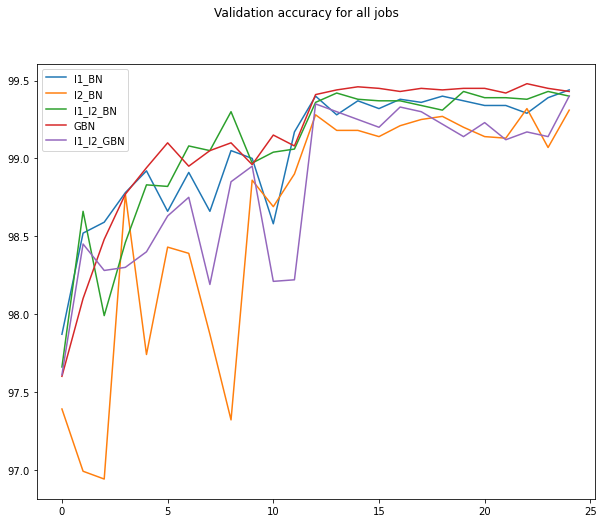


**** Ended Plotting multigraph ****


Plotting graph for Loss curves for all jobs


**** Started Plotting multigraph ****



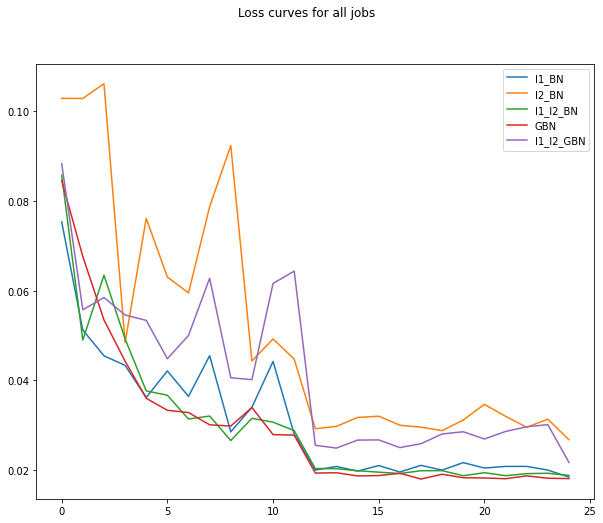


**** Ended Plotting multigraph ****


**** Started plot_misclassified_images ****


**** Ended plot_misclassified_images ****



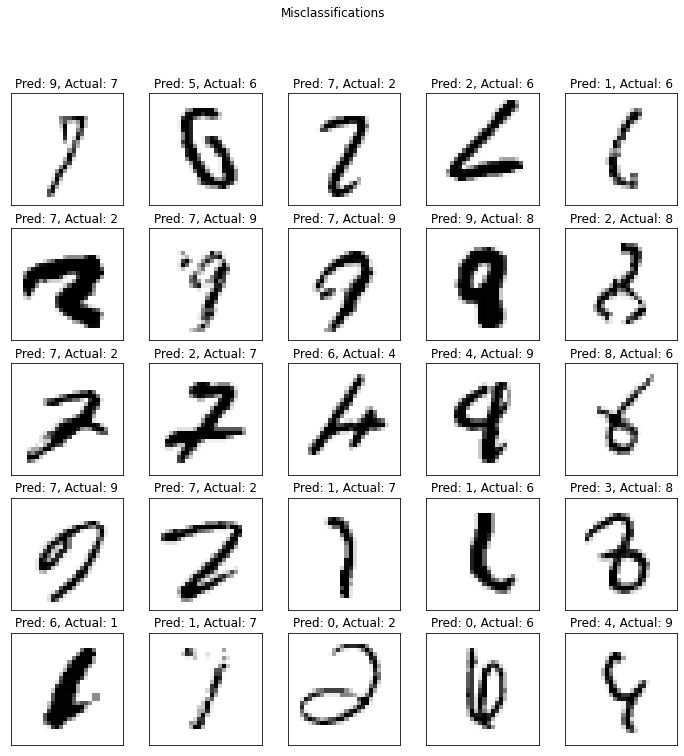

In [ ]:
## Plot the results

for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)

plot_results(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy for all jobs")
plot_results(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves for all jobs")

plot_misclassified_images(results['GBN'][4], device, test_loader, num_of_images = 25)